# Positive Volume Index

[Investopedia Link](https://www.investopedia.com/terms/p/pvi.asp)

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


import warnings
warnings.filterwarnings("ignore")

# to fetch data 
import yfinance as yf

import talib as ta

## Import Stock Price of Reliance

In [2]:
symbol = 'RELIANCE.NS'
start = '2015-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,443.149994,446.000000,441.825012,443.950012,415.367096,1354878
2015-01-02,444.049988,448.024994,442.149994,442.774994,414.267700,3351654
2015-01-05,442.500000,445.450012,437.049988,437.924988,409.729980,4619182
2015-01-06,435.000000,436.500000,416.000000,418.049988,391.134613,8516086
2015-01-07,418.549988,429.399994,418.500000,427.149994,399.648712,9472630


## Generating PVI values

If volume traded today is less than volume traded yesterday:  
PVI = Previous(day) PVI  
else  
PVI = Previous PVI*(1 + returns)

In [3]:
returns = df['Close'].pct_change()
vol_increase = (df['Volume'].shift(1) < df['Volume'])  #to compare volume traded today with yesterday

pvi = pd.Series(data=np.nan, index=df['Adj Close'].index, dtype='float64')  #initialising pvi as a series with nan value

pvi.iloc[0] = 1000  #random number
for i in range(1,len(pvi)):
    if vol_increase.iloc[i]:
        pvi.iloc[i] = pvi.iloc[i - 1] * (1.0 + returns.iloc[i])
    else:
        pvi.iloc[i] = pvi.iloc[i - 1]

df['PVI'] = pd.Series(pvi)

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,PVI
Date,,,,,,,
2015-01-01,443.149994,446.000000,441.825012,443.950012,415.367096,1354878,1000.000000
2015-01-02,444.049988,448.024994,442.149994,442.774994,414.267700,3351654,997.353264
2015-01-05,442.500000,445.450012,437.049988,437.924988,409.729980,4619182,986.428597
2015-01-06,435.000000,436.500000,416.000000,418.049988,391.134613,8516086,941.660043
2015-01-07,418.549988,429.399994,418.500000,427.149994,399.648712,9472630,962.157860


In [5]:
#9 day and 255 days moving average of PVI
df['PVI_9'] = ta.MA(df['PVI'], timeperiod = 9)
df['PVI_255'] = ta.MA(df['PVI'], timeperiod = 255)
df.dropna(inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,PVI,PVI_9,PVI_255
Date,,,,,,,,,
2016-01-13,526.549988,544.875000,523.599976,538.424988,515.602234,32825622,1281.438332,1211.763075,1010.919047
2016-01-14,531.924988,540.500000,526.525024,530.825012,508.324341,12719826,1281.438332,1221.833455,1012.022727
2016-01-15,534.875000,544.750000,532.799988,536.650024,513.902466,13151450,1295.500205,1236.079006,1013.191931
2016-01-18,537.500000,541.974976,504.049988,508.424988,486.873810,12459918,1295.500205,1250.324558,1014.403976
2016-01-19,514.500000,524.900024,507.049988,521.799988,499.681915,9824192,1295.500205,1261.079740,1015.791585


### Graphical Analysis

Text(0.5, 0, 'Date')

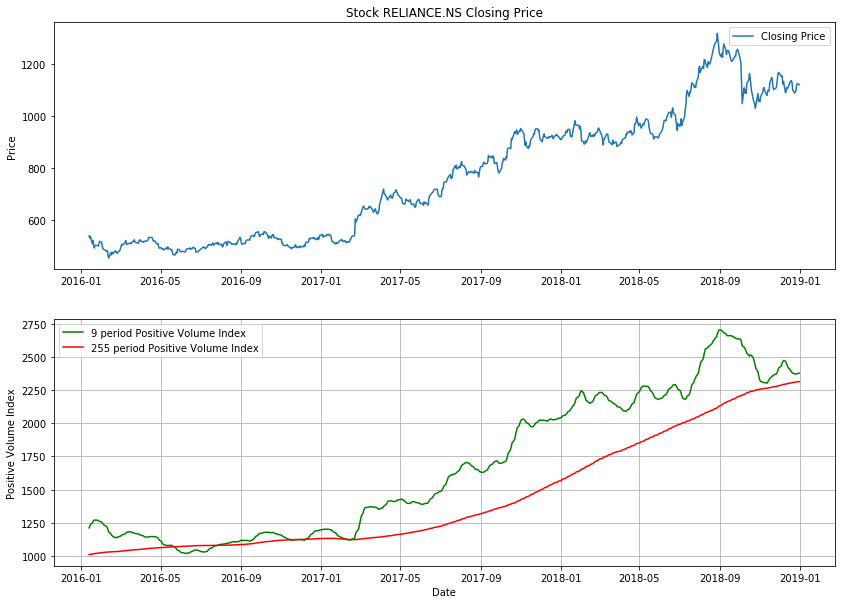

In [6]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Close'], label='Closing Price')
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['PVI_9'], label='9 period Positive Volume Index', color='green')
ax2.plot(df['PVI_255'], label='255 period Positive Volume Index', color = 'red')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('Positive Volume Index')
ax2.set_xlabel('Date')

The graph clearly shows the uptrend in the stock price of Reliance after Feb 2017 as the 9 period PVI is way above the 255 period PVI